In [1]:
import os, sys
id = 3
os.environ['CUDA_VISIBLE_DEVICES'] = str(id)

from qwen2_utils import *
import torch
import gc
from functools import partial

from maestro.trainer.models.qwen_2_5_vl.core import train
from maestro.trainer.models.qwen_2_5_vl.checkpoints import load_model
from maestro.trainer.models.qwen_2_5_vl.loaders import evaluation_collate_fn, train_collate_fn
from maestro.trainer.models.qwen_2_5_vl.detection import (
    detections_to_prefix_formatter,
    detections_to_suffix_formatter,
)
from maestro.trainer.common.datasets.core import create_data_loaders
import matplotlib.pyplot as plt

DEVICE = torch.device('cuda')

sys.path.append('/home/shataxi.dubey/shataxi_work/VLM_high_res')

#### Set parameters before training

In [2]:
region = "lucknow" # "west_bengal" or "lucknow"
train_on_both_bg_non_bg = True

type = 'png'
epochs = 50
batch_size = 4
param = 3
SYSTEM_MESSAGE = "You are a helpful assistant."
MIN_PIXELS = 256 * 28 * 28
MAX_PIXELS = 512 * 28 * 28

if region == 'lucknow':
    dynamic_dir = '/home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/dynamic_lucknow_coco_train_test'
    test_set_path = '/home/shataxi.dubey/shataxi_work/vlm_on_planet/gms/lucknow_small_600_sq_km/kiln_images/test'
    valid_set_path = '/home/shataxi.dubey/shataxi_work/vlm_on_planet/gms/lucknow_small_600_sq_km/kiln_images/valid'
    if train_on_both_bg_non_bg:
        training_set_path = '/home/shataxi.dubey/shataxi_work/vlm_on_planet/gms/lucknow_small_600_sq_km/kiln_images/train_with_background_images'
    else:
        training_set_path = '/home/shataxi.dubey/shataxi_work/vlm_on_planet/gms/lucknow_small_600_sq_km/kiln_images/train'

if region == 'west_bengal':
    dynamic_dir = '/home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/dynamic_lucknow_coco_train_test'
    test_set_path = '/home/shataxi.dubey/shataxi_work/vlm_on_planet/gms/west_bengal_small_639_sq_km/kiln_images/test'
    valid_set_path = '/home/shataxi.dubey/shataxi_work/vlm_on_planet/gms/west_bengal_small_639_sq_km/kiln_images/valid'
    if train_on_both_bg_non_bg:
        training_set_path = '/home/shataxi.dubey/shataxi_work/vlm_on_planet/gms/west_bengal_small_639_sq_km/kiln_images/train_with_background_images'
    else:
        training_set_path = '/home/shataxi.dubey/shataxi_work/vlm_on_planet/gms/west_bengal_small_639_sq_km/kiln_images/train'

#### Training

[INFO] maestro - No LoRA parameters provided. Using default configuration.


The argument `trust_remote_code` is to be used with Auto classes. It has no effect here and is ignored.


Loading checkpoint shards:   0%|          | 0/5 [00:00<?, ?it/s]

trainable params: 2,523,136 || all params: 8,294,689,792 || trainable%: 0.0304
[INFO] maestro - Dataset found locally at: /home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/dynamic_lucknow_coco_train_test
[INFO] maestro - Creating data loaders from '/home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/dynamic_lucknow_coco_train_test'...
[INFO] maestro - Detected COCO dataset format.
[INFO] maestro - Found COCO split 'train' at: /home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/dynamic_lucknow_coco_train_test/train/_annotations.coco.json
[WARNING] maestro - Skipping file: image file not found '/home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/dynamic_lucknow_coco_train_test/train/9024349.6365_3081441.1535.png'
[WARNING] maestro - Skipping file: image file not found '/home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/dynamic_lucknow_coco_train_test/train/9024349.6365_3081746.9016.png'
[WARNING] maestro - Skipping file: image file not found '/home/shatax

The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/shataxi.dubey/miniconda3/envs/shataxi_space/li ...
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
`Trainer(limit_val_batches=1)` was configured so 1 batch will be used.
You are using a CUDA device ('NVIDIA A100-SXM4-80GB') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [1]

  | Name  | Type                 | Params | Mode 
-------------------------------------------------------
0 | model | PeftModelForCausalLM | 4.7 B  | train
----------------

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=63` in the `DataLoader` to improve performance.


[INFO] maestro - sample valid prefix: Outline the position of brick kilns with chimney. Output all the coordinates in JSON format.
[INFO] maestro - sample valid suffix: ```json
[
	{"bbox_2d": [158, 116, 252, 268], "label": "brick kilns with chimney"}
]
```
[INFO] maestro - sample generated suffix:  addCriterion


































































































































































































































































































































































































































































































































The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=63` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: Outline the position of brick kilns with chimney. Output all the coordinates in JSON format.
[INFO] maestro - sample valid suffix: ```json
[
	{"bbox_2d": [158, 116, 252, 268], "label": "brick kilns with chimney"}
]
```
[INFO] maestro - sample generated suffix: 2D




```json
[
	{"bbox_2d": [108, 97, 234, 256], "label": "brick kilns with chimney"}
]
```
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: Outline the position of brick kilns with chimney. Output all the coordinates in JSON format.
[INFO] maestro - sample valid suffix: ```json
[
	{"bbox_2d": [158, 116, 252, 268], "label": "brick kilns with chimney"}
]
```
[INFO] maestro - sample generated suffix: assistant
```json
[
	{"bbox_2d": [148, 97, 235, 246], "label": "brick kilns with chimney"}
]
```
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: Outline the position of brick kilns with chimney. Output all the coordinates in JSON format.
[INFO] maestro - sample valid suffix: ```json
[
	{"bbox_2d": [158, 116, 252, 268], "label": "brick kilns with chimney"}
]
```
[INFO] maestro - sample generated suffix: assistant
```json
[
	{"bbox_2d": [108, 97, 234, 256], "label": "brick kilns with chimney"}
]
```
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: Outline the position of brick kilns with chimney. Output all the coordinates in JSON format.
[INFO] maestro - sample valid suffix: ```json
[
	{"bbox_2d": [158, 116, 252, 268], "label": "brick kilns with chimney"}
]
```
[INFO] maestro - sample generated suffix: assistant
```json
[
	{"bbox_2d": [104, 97, 238, 256], "label": "brick kilns with chimney"}
]
```
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: Outline the position of brick kilns with chimney. Output all the coordinates in JSON format.
[INFO] maestro - sample valid suffix: ```json
[
	{"bbox_2d": [158, 116, 252, 268], "label": "brick kilns with chimney"}
]
```
[INFO] maestro - sample generated suffix: assistant
```json
[
	{"bbox_2d": [148, 97, 250, 236], "label": "brick kilns with chimney"}
]
```
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: Outline the position of brick kilns with chimney. Output all the coordinates in JSON format.
[INFO] maestro - sample valid suffix: ```json
[
	{"bbox_2d": [158, 116, 252, 268], "label": "brick kilns with chimney"}
]
```
[INFO] maestro - sample generated suffix: assistant
```json
[
	{"bbox_2d": [104, 116, 237, 258], "label": "brick kilns with chimney"}
]
```
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: Outline the position of brick kilns with chimney. Output all the coordinates in JSON format.
[INFO] maestro - sample valid suffix: ```json
[
	{"bbox_2d": [158, 116, 252, 268], "label": "brick kilns with chimney"}
]
```
[INFO] maestro - sample generated suffix: assistant
```json
[
	{"bbox_2d": [140, 105, 263, 257], "label": "brick kilns with chimney"}
]
```
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: Outline the position of brick kilns with chimney. Output all the coordinates in JSON format.
[INFO] maestro - sample valid suffix: ```json
[
	{"bbox_2d": [158, 116, 252, 268], "label": "brick kilns with chimney"}
]
```
[INFO] maestro - sample generated suffix: assistant
```json
[
	{"bbox_2d": [174, 105, 283, 269], "label": "brick kilns with chimney"}
]
```
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: Outline the position of brick kilns with chimney. Output all the coordinates in JSON format.
[INFO] maestro - sample valid suffix: ```json
[
	{"bbox_2d": [158, 116, 252, 268], "label": "brick kilns with chimney"}
]
```
[INFO] maestro - sample generated suffix: assistant
```json
[
	{"bbox_2d": [178, 96, 304, 258], "label": "brick kilns with chimney"}
]
```
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: Outline the position of brick kilns with chimney. Output all the coordinates in JSON format.
[INFO] maestro - sample valid suffix: ```json
[
	{"bbox_2d": [158, 116, 252, 268], "label": "brick kilns with chimney"}
]
```
[INFO] maestro - sample generated suffix: assistant
```json
[
	{"bbox_2d": [154, 98, 263, 237], "label": "brick kilns with chimney"}
]
```
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: Outline the position of brick kilns with chimney. Output all the coordinates in JSON format.
[INFO] maestro - sample valid suffix: ```json
[
	{"bbox_2d": [158, 116, 252, 268], "label": "brick kilns with chimney"}
]
```
[INFO] maestro - sample generated suffix: assistant
```json
[
	{"bbox_2d": [105, 98, 247, 263], "label": "brick kilns with chimney"}
]
```
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: Outline the position of brick kilns with chimney. Output all the coordinates in JSON format.
[INFO] maestro - sample valid suffix: ```json
[
	{"bbox_2d": [158, 116, 252, 268], "label": "brick kilns with chimney"}
]
```
[INFO] maestro - sample generated suffix: assistant
```json
[
	{"bbox_2d": [152, 98, 273, 264], "label": "brick kilns with chimney"}
]
```
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: Outline the position of brick kilns with chimney. Output all the coordinates in JSON format.
[INFO] maestro - sample valid suffix: ```json
[
	{"bbox_2d": [158, 116, 252, 268], "label": "brick kilns with chimney"}
]
```
[INFO] maestro - sample generated suffix: assistant
```json
[
	{"bbox_2d": [152, 98, 263, 257], "label": "brick kilns with chimney"}
]
```
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: Outline the position of brick kilns with chimney. Output all the coordinates in JSON format.
[INFO] maestro - sample valid suffix: ```json
[
	{"bbox_2d": [158, 116, 252, 268], "label": "brick kilns with chimney"}
]
```
[INFO] maestro - sample generated suffix: assistant
```json
[
	{"bbox_2d": [73, 100, 225, 264], "label": "brick kilns with chimney"}
]
```
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: Outline the position of brick kilns with chimney. Output all the coordinates in JSON format.
[INFO] maestro - sample valid suffix: ```json
[
	{"bbox_2d": [158, 116, 252, 268], "label": "brick kilns with chimney"}
]
```
[INFO] maestro - sample generated suffix: assistant
```json
[
	{"bbox_2d": [103, 110, 247, 265], "label": "brick kilns with chimney"}
]
```
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: Outline the position of brick kilns with chimney. Output all the coordinates in JSON format.
[INFO] maestro - sample valid suffix: ```json
[
	{"bbox_2d": [158, 116, 252, 268], "label": "brick kilns with chimney"}
]
```
[INFO] maestro - sample generated suffix: assistant
```json
[
	{"bbox_2d": [152, 108, 263, 264], "label": "brick kilns with chimney"}
]
```
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: Outline the position of brick kilns with chimney. Output all the coordinates in JSON format.
[INFO] maestro - sample valid suffix: ```json
[
	{"bbox_2d": [158, 116, 252, 268], "label": "brick kilns with chimney"}
]
```
[INFO] maestro - sample generated suffix: assistant
```json
[
	{"bbox_2d": [102, 95, 227, 248], "label": "brick kilns with chimney"}
]
```
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: Outline the position of brick kilns with chimney. Output all the coordinates in JSON format.
[INFO] maestro - sample valid suffix: ```json
[
	{"bbox_2d": [158, 116, 252, 268], "label": "brick kilns with chimney"}
]
```
[INFO] maestro - sample generated suffix: assistant
```json
[
	{"bbox_2d": [109, 100, 243, 256], "label": "brick kilns with chimney"}
]
```
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: Outline the position of brick kilns with chimney. Output all the coordinates in JSON format.
[INFO] maestro - sample valid suffix: ```json
[
	{"bbox_2d": [158, 116, 252, 268], "label": "brick kilns with chimney"}
]
```
[INFO] maestro - sample generated suffix: assistant
```json
[
	{"bbox_2d": [15, 9, 170, 94], "label": "brick kilns with chimney"},
	{"bbox_2d": [305, 9, 420, 94], "label": "brick kilns with chimney"}
]
```
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: Outline the position of brick kilns with chimney. Output all the coordinates in JSON format.
[INFO] maestro - sample valid suffix: ```json
[
	{"bbox_2d": [158, 116, 252, 268], "label": "brick kilns with chimney"}
]
```
[INFO] maestro - sample generated suffix: assistant
```json
[
	{"bbox_2d": [14, 9, 165, 148], "label": "brick kilns with chimney"},
	{"bbox_2d": [190, 79, 303, 244], "label": "brick kilns with chimney"}
]
```
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: Outline the position of brick kilns with chimney. Output all the coordinates in JSON format.
[INFO] maestro - sample valid suffix: ```json
[
	{"bbox_2d": [158, 116, 252, 268], "label": "brick kilns with chimney"}
]
```
[INFO] maestro - sample generated suffix: assistant
```json
[
	{"bbox_2d": [152, 100, 264, 253], "label": "brick kilns with chimney"}
]
```
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: Outline the position of brick kilns with chimney. Output all the coordinates in JSON format.
[INFO] maestro - sample valid suffix: ```json
[
	{"bbox_2d": [158, 116, 252, 268], "label": "brick kilns with chimney"}
]
```
[INFO] maestro - sample generated suffix: assistant
```json
[
	{"bbox_2d": [149, 105, 261, 253], "label": "brick kilns with chimney"}
]
```
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: Outline the position of brick kilns with chimney. Output all the coordinates in JSON format.
[INFO] maestro - sample valid suffix: ```json
[
	{"bbox_2d": [158, 116, 252, 268], "label": "brick kilns with chimney"}
]
```
[INFO] maestro - sample generated suffix: assistant
```json
[
	{"bbox_2d": [152, 100, 263, 253], "label": "brick kilns with chimney"}
]
```
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: Outline the position of brick kilns with chimney. Output all the coordinates in JSON format.
[INFO] maestro - sample valid suffix: ```json
[
	{"bbox_2d": [158, 116, 252, 268], "label": "brick kilns with chimney"}
]
```
[INFO] maestro - sample generated suffix: assistant
```json
[
	{"bbox_2d": [149, 105, 261, 253], "label": "brick kilns with chimney"}
]
```
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: Outline the position of brick kilns with chimney. Output all the coordinates in JSON format.
[INFO] maestro - sample valid suffix: ```json
[
	{"bbox_2d": [158, 116, 252, 268], "label": "brick kilns with chimney"}
]
```
[INFO] maestro - sample generated suffix: assistant
```json
[
	{"bbox_2d": [152, 95, 263, 253], "label": "brick kilns with chimney"}
]
```
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: Outline the position of brick kilns with chimney. Output all the coordinates in JSON format.
[INFO] maestro - sample valid suffix: ```json
[
	{"bbox_2d": [158, 116, 252, 268], "label": "brick kilns with chimney"}
]
```
[INFO] maestro - sample generated suffix: assistant
```json
[
	{"bbox_2d": [152, 95, 263, 253], "label": "brick kilns with chimney"}
]
```
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: Outline the position of brick kilns with chimney. Output all the coordinates in JSON format.
[INFO] maestro - sample valid suffix: ```json
[
	{"bbox_2d": [158, 116, 252, 268], "label": "brick kilns with chimney"}
]
```
[INFO] maestro - sample generated suffix: assistant
```json
[
	{"bbox_2d": [152, 95, 263, 253], "label": "brick kilns with chimney"}
]
```
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: Outline the position of brick kilns with chimney. Output all the coordinates in JSON format.
[INFO] maestro - sample valid suffix: ```json
[
	{"bbox_2d": [158, 116, 252, 268], "label": "brick kilns with chimney"}
]
```
[INFO] maestro - sample generated suffix: assistant
```json
[
	{"bbox_2d": [152, 95, 243, 253], "label": "brick kilns with chimney"}
]
```
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: Outline the position of brick kilns with chimney. Output all the coordinates in JSON format.
[INFO] maestro - sample valid suffix: ```json
[
	{"bbox_2d": [158, 116, 252, 268], "label": "brick kilns with chimney"}
]
```
[INFO] maestro - sample generated suffix: assistant
```json
[
	{"bbox_2d": [152, 95, 264, 253], "label": "brick kilns with chimney"}
]
```
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: Outline the position of brick kilns with chimney. Output all the coordinates in JSON format.
[INFO] maestro - sample valid suffix: ```json
[
	{"bbox_2d": [158, 116, 252, 268], "label": "brick kilns with chimney"}
]
```
[INFO] maestro - sample generated suffix: assistant
```json
[
	{"bbox_2d": [152, 97, 263, 253], "label": "brick kilns with chimney"}
]
```
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: Outline the position of brick kilns with chimney. Output all the coordinates in JSON format.
[INFO] maestro - sample valid suffix: ```json
[
	{"bbox_2d": [158, 116, 252, 268], "label": "brick kilns with chimney"}
]
```
[INFO] maestro - sample generated suffix: assistant
```json
[
	{"bbox_2d": [152, 97, 263, 255], "label": "brick kilns with chimney"}
]
```
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: Outline the position of brick kilns with chimney. Output all the coordinates in JSON format.
[INFO] maestro - sample valid suffix: ```json
[
	{"bbox_2d": [158, 116, 252, 268], "label": "brick kilns with chimney"}
]
```
[INFO] maestro - sample generated suffix: assistant
```json
[
	{"bbox_2d": [152, 95, 260, 253], "label": "brick kilns with chimney"}
]
```
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: Outline the position of brick kilns with chimney. Output all the coordinates in JSON format.
[INFO] maestro - sample valid suffix: ```json
[
	{"bbox_2d": [158, 116, 252, 268], "label": "brick kilns with chimney"}
]
```
[INFO] maestro - sample generated suffix: assistant
```json
[
	{"bbox_2d": [158, 109, 263, 254], "label": "brick kilns with chimney"}
]
```
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: Outline the position of brick kilns with chimney. Output all the coordinates in JSON format.
[INFO] maestro - sample valid suffix: ```json
[
	{"bbox_2d": [158, 116, 252, 268], "label": "brick kilns with chimney"}
]
```
[INFO] maestro - sample generated suffix: assistant
```json
[
	{"bbox_2d": [152, 97, 263, 253], "label": "brick kilns with chimney"}
]
```
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: Outline the position of brick kilns with chimney. Output all the coordinates in JSON format.
[INFO] maestro - sample valid suffix: ```json
[
	{"bbox_2d": [158, 116, 252, 268], "label": "brick kilns with chimney"}
]
```
[INFO] maestro - sample generated suffix: assistant
```json
[
	{"bbox_2d": [152, 95, 267, 253], "label": "brick kilns with chimney"}
]
```
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: Outline the position of brick kilns with chimney. Output all the coordinates in JSON format.
[INFO] maestro - sample valid suffix: ```json
[
	{"bbox_2d": [158, 116, 252, 268], "label": "brick kilns with chimney"}
]
```
[INFO] maestro - sample generated suffix: assistant
```json
[
	{"bbox_2d": [152, 105, 263, 253], "label": "brick kilns with chimney"}
]
```
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: Outline the position of brick kilns with chimney. Output all the coordinates in JSON format.
[INFO] maestro - sample valid suffix: ```json
[
	{"bbox_2d": [158, 116, 252, 268], "label": "brick kilns with chimney"}
]
```
[INFO] maestro - sample generated suffix: assistant
```json
[
	{"bbox_2d": [109, 96, 214, 253], "label": "brick kilns with chimney"}
]
```
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: Outline the position of brick kilns with chimney. Output all the coordinates in JSON format.
[INFO] maestro - sample valid suffix: ```json
[
	{"bbox_2d": [158, 116, 252, 268], "label": "brick kilns with chimney"}
]
```
[INFO] maestro - sample generated suffix: assistant
```json
[
	{"bbox_2d": [102, 96, 217, 253], "label": "brick kilns with chimney"}
]
```
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: Outline the position of brick kilns with chimney. Output all the coordinates in JSON format.
[INFO] maestro - sample valid suffix: ```json
[
	{"bbox_2d": [158, 116, 252, 268], "label": "brick kilns with chimney"}
]
```
[INFO] maestro - sample generated suffix: assistant
```json
[
	{"bbox_2d": [106, 97, 217, 253], "label": "brick kilns with chimney"}
]
```
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: Outline the position of brick kilns with chimney. Output all the coordinates in JSON format.
[INFO] maestro - sample valid suffix: ```json
[
	{"bbox_2d": [158, 116, 252, 268], "label": "brick kilns with chimney"}
]
```
[INFO] maestro - sample generated suffix: assistant
```json
[
	{"bbox_2d": [106, 97, 215, 253], "label": "brick kilns with chimney"}
]
```
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: Outline the position of brick kilns with chimney. Output all the coordinates in JSON format.
[INFO] maestro - sample valid suffix: ```json
[
	{"bbox_2d": [158, 116, 252, 268], "label": "brick kilns with chimney"}
]
```
[INFO] maestro - sample generated suffix: assistant
```json
[
	{"bbox_2d": [106, 98, 217, 253], "label": "brick kilns with chimney"}
]
```
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: Outline the position of brick kilns with chimney. Output all the coordinates in JSON format.
[INFO] maestro - sample valid suffix: ```json
[
	{"bbox_2d": [158, 116, 252, 268], "label": "brick kilns with chimney"}
]
```
[INFO] maestro - sample generated suffix: assistant
```json
[
	{"bbox_2d": [106, 97, 215, 253], "label": "brick kilns with chimney"}
]
```
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: Outline the position of brick kilns with chimney. Output all the coordinates in JSON format.
[INFO] maestro - sample valid suffix: ```json
[
	{"bbox_2d": [158, 116, 252, 268], "label": "brick kilns with chimney"}
]
```
[INFO] maestro - sample generated suffix: assistant
```json
[
	{"bbox_2d": [106, 97, 215, 253], "label": "brick kilns with chimney"}
]
```
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: Outline the position of brick kilns with chimney. Output all the coordinates in JSON format.
[INFO] maestro - sample valid suffix: ```json
[
	{"bbox_2d": [158, 116, 252, 268], "label": "brick kilns with chimney"}
]
```
[INFO] maestro - sample generated suffix: assistant
```json
[
	{"bbox_2d": [106, 98, 217, 253], "label": "brick kilns with chimney"}
]
```
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: Outline the position of brick kilns with chimney. Output all the coordinates in JSON format.
[INFO] maestro - sample valid suffix: ```json
[
	{"bbox_2d": [158, 116, 252, 268], "label": "brick kilns with chimney"}
]
```
[INFO] maestro - sample generated suffix: assistant
```json
[
	{"bbox_2d": [102, 97, 217, 253], "label": "brick kilns with chimney"}
]
```
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: Outline the position of brick kilns with chimney. Output all the coordinates in JSON format.
[INFO] maestro - sample valid suffix: ```json
[
	{"bbox_2d": [158, 116, 252, 268], "label": "brick kilns with chimney"}
]
```
[INFO] maestro - sample generated suffix: assistant
```json
[
	{"bbox_2d": [102, 95, 217, 253], "label": "brick kilns with chimney"}
]
```
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: Outline the position of brick kilns with chimney. Output all the coordinates in JSON format.
[INFO] maestro - sample valid suffix: ```json
[
	{"bbox_2d": [158, 116, 252, 268], "label": "brick kilns with chimney"}
]
```
[INFO] maestro - sample generated suffix: assistant
```json
[
	{"bbox_2d": [106, 98, 217, 253], "label": "brick kilns with chimney"}
]
```
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: Outline the position of brick kilns with chimney. Output all the coordinates in JSON format.
[INFO] maestro - sample valid suffix: ```json
[
	{"bbox_2d": [158, 116, 252, 268], "label": "brick kilns with chimney"}
]
```
[INFO] maestro - sample generated suffix: assistant
```json
[
	{"bbox_2d": [102, 96, 217, 253], "label": "brick kilns with chimney"}
]
```
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: Outline the position of brick kilns with chimney. Output all the coordinates in JSON format.
[INFO] maestro - sample valid suffix: ```json
[
	{"bbox_2d": [158, 116, 252, 268], "label": "brick kilns with chimney"}
]
```
[INFO] maestro - sample generated suffix: assistant
```json
[
	{"bbox_2d": [102, 96, 217, 253], "label": "brick kilns with chimney"}
]
```
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/1/checkpoints/latest


Validation: |          | 0/? [00:00<?, ?it/s]

[INFO] maestro - sample valid prefix: Outline the position of brick kilns with chimney. Output all the coordinates in JSON format.
[INFO] maestro - sample valid suffix: ```json
[
	{"bbox_2d": [158, 116, 252, 268], "label": "brick kilns with chimney"}
]
```
[INFO] maestro - sample generated suffix: assistant
```json
[
	{"bbox_2d": [106, 98, 217, 253], "label": "brick kilns with chimney"}
]
```
Saved latest checkpoint to /home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/1/checkpoints/latest


`Trainer.fit` stopped: `max_epochs=50` reached.
The argument `trust_remote_code` is to be used with Auto classes. It has no effect here and is ignored.


Loading checkpoint shards:   0%|          | 0/5 [00:00<?, ?it/s]

Checkpoint saved at ./gms_training/7B_lucknow_50_epochs_98_non_bg_50_bg_batch_size_4
[INFO] maestro - Creating data loaders from '/home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/dynamic_lucknow_coco_train_test'...
[INFO] maestro - Detected COCO dataset format.
[INFO] maestro - Found COCO split 'train' at: /home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/dynamic_lucknow_coco_train_test/train/_annotations.coco.json
[WARNING] maestro - Skipping file: image file not found '/home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/dynamic_lucknow_coco_train_test/train/9024349.6365_3081441.1535.png'
[WARNING] maestro - Skipping file: image file not found '/home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/dynamic_lucknow_coco_train_test/train/9024349.6365_3081746.9016.png'
[WARNING] maestro - Skipping file: image file not found '/home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/dynamic_lucknow_coco_train_test/train/9024349.6365_3082052.6498.png'
[WARNING] ma

 14%|█▍        | 1/7 [00:03<00:18,  3.02s/it]

Generated text assistant
```json
[
	{"bbox_2d": [149, 107, 300, 253], "label": "brick kilns with chimney"}
]
```
Generated text assistant
```json
[
	{"bbox_2d": [78, 38, 217, 196], "label": "brick kilns with chimney"}
]
```
Generated text assistant
```json
[
	{"bbox_2d": [1, 278, 179, 408], "label": "brick kilns with chimney"}
]
```
Generated text assistant
```json
[
	{"bbox_2d": [78, 110, 243, 281], "label": "brick kilns with chimney"}
]
```


 29%|██▊       | 2/7 [00:05<00:14,  2.97s/it]

Generated text assistant
```json
[
	{"bbox_2d": [102, 158, 234, 324], "label": "brick kilns with chimney"}
]
```
Generated text assistant
```json
[
	{"bbox_2d": [15, 110, 168, 303], "label": "brick kilns with chimney"}
]
```
Generated text assistant
```json
[
	{"bbox_2d": [207, 247, 317, 368], "label": "brick kilns with chimney"}
]
```
Generated text assistant
```json
[
	{"bbox_2d": [197, 250, 336, 366], "label": "brick kilns with chimney"}
]
```


 43%|████▎     | 3/7 [00:08<00:11,  2.97s/it]

Generated text assistant
```json
[
	{"bbox_2d": [87, 114, 228, 285], "label": "brick kilns with chimney"}
]
```
Generated text assistant
```json
[
	{"bbox_2d": [179, 256, 309, 436], "label": "brick kilns with chimney"}
]
```
Generated text assistant
```json
[

]
```
Generated text assistant
```json
[
	{"bbox_2d": [180, 131, 334, 381], "label": "brick kilns with chimney"}
]
```


 57%|█████▋    | 4/7 [00:11<00:08,  2.96s/it]

Generated text assistant
```json
[
	{"bbox_2d": [282, 97, 410, 196], "label": "brick kilns with chimney"}
]
```
Generated text assistant
```json
[
	{"bbox_2d": [71, 164, 225, 319], "label": "brick kilns with chimney"}
]
```
Generated text assistant
```json
[
	{"bbox_2d": [107, 253, 234, 382], "label": "brick kilns with chimney"}
]
```
Generated text assistant
```json
[
	{"bbox_2d": [204, 163, 383, 331], "label": "brick kilns with chimney"}
]
```


 71%|███████▏  | 5/7 [00:14<00:05,  2.86s/it]

Generated text assistant
```json
[
	{"bbox_2d": [275, 218, 436, 389], "label": "brick kilns with chimney"}
]
```
Generated text assistant
```json
[
	{"bbox_2d": [261, 90, 405, 212], "label": "brick kilns with chimney"}
]
```
Generated text assistant
```json
[
	{"bbox_2d": [287, 134, 441, 295], "label": "brick kilns with chimney"}
]
```
Generated text assistant
```json
[
	{"bbox_2d": [184, 65, 330, 241], "label": "brick kilns with chimney"}
]
```


 86%|████████▌ | 6/7 [00:17<00:02,  2.73s/it]

Generated text assistant
```json
[
	{"bbox_2d": [213, 208, 405, 367], "label": "brick kilns with chimney"}
]
```
Generated text assistant
```json
[
	{"bbox_2d": [28, 153, 179, 249], "label": "brick kilns with chimney"}
]
```
Generated text assistant
```json
[
	{"bbox_2d": [14, 67, 175, 236], "label": "brick kilns with chimney"}
]
```
Generated text assistant
```json
[
	{"bbox_2d": [117, 155, 239, 323], "label": "brick kilns with chimney"}
]
```


100%|██████████| 7/7 [00:18<00:00,  2.69s/it]

Generated text assistant
```json
[
	{"bbox_2d": [205, 313, 327, 436], "label": "brick kilns with chimney"}
]
```
Metrics from model trained on 98 kiln images and 50 background images


Plot of Confusion matrix at IoU 0.7



The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


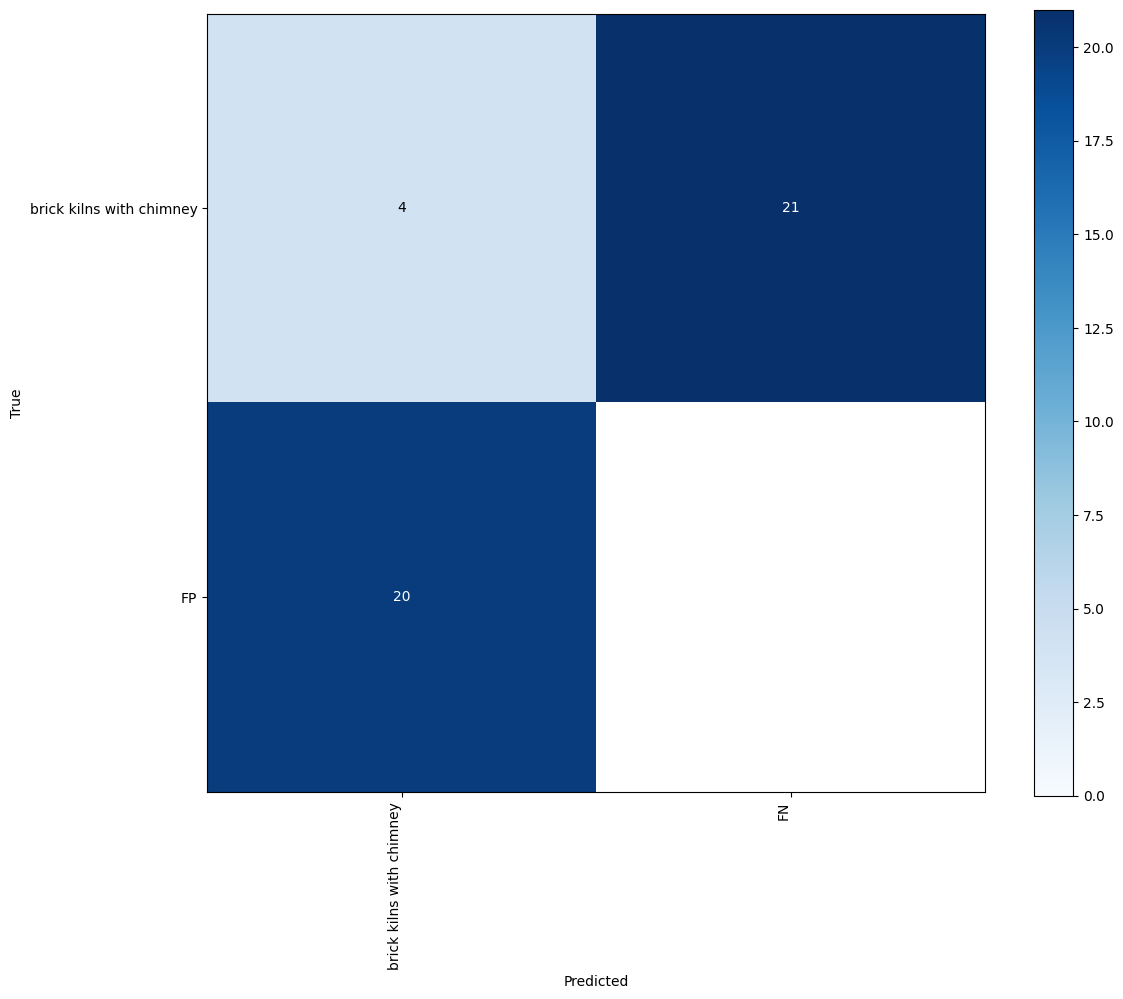

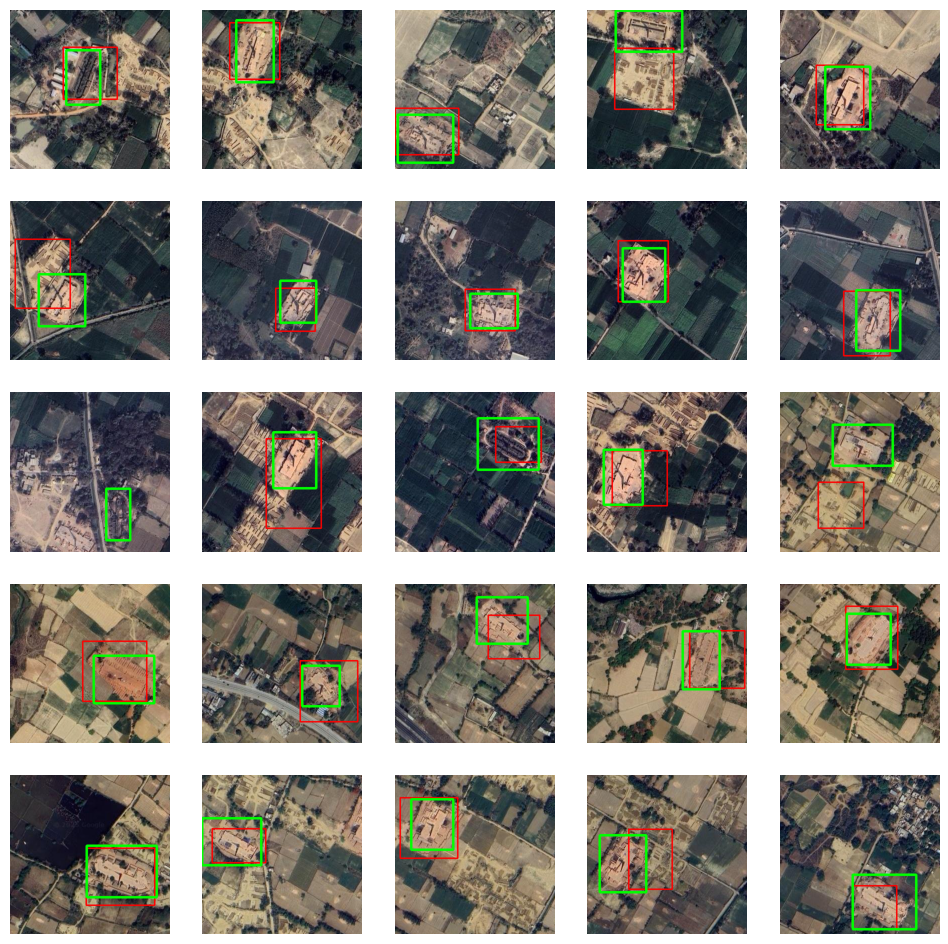

In [3]:
writer = pd.ExcelWriter(f'Qwen2_5_VL_{region}_{param}B_Instruct.xlsx', engine = 'xlsxwriter')
row = 0

num_bg_image = 50
for num_non_bg_image in [98]:
    create_train_directory(dynamic_dir, training_set_path, num_non_bg_image, num_bg_image, type)
    create_test_directory(dynamic_dir, test_set_path)
    create_valid_directory(dynamic_dir, test_set_path)

    advanced_params = {
        "r": 8,
    }

    config = {
        "model_id": f"Qwen/Qwen2.5-VL-{param}B-Instruct",
        "dataset": '/home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/dynamic_lucknow_coco_train_test',
        "system_message": SYSTEM_MESSAGE,
        "min_pixels": MIN_PIXELS,
        "max_pixels": MAX_PIXELS,
        "epochs": epochs,
        "batch_size": batch_size,
        "accumulate_grad_batches": 1,
        # "num_workers": 10,
        "optimization_strategy": "qlora",
        "metrics": ["edit_distance", "mean_average_precision"],
        # "peft_advanced_params": advanced_params,
        "output_dir": 'gms_training',
    }

    train(config)

    processor, model = load_model(
        model_id_or_path=f"./gms_training/1/checkpoints/latest",
        min_pixels=MIN_PIXELS,
        max_pixels=MAX_PIXELS,
        )
    
    os.rename("./gms_training/1", f"./gms_training/{param}B_{region}_{epochs}_epochs_{num_non_bg_image}_non_bg_{num_bg_image}_bg_batch_size_{batch_size}")
    print(f'Checkpoint saved at ./gms_training/{param}B_{region}_{epochs}_epochs_{num_non_bg_image}_non_bg_{num_bg_image}_bg_batch_size_{batch_size}')

    # idx = 0
    # directory = dynamic_dir + '/train'
    # annotated_image = sample_test(model, processor, 0, directory, MIN_PIXELS, MAX_PIXELS)
    # plt.imshow(annotated_image)
    # plt.gca().set_axis_off()
    # plt.title(f'one sample from train set')

    train_loader, valid_loader, test_loader = create_data_loaders(
                    dataset_location= dynamic_dir,
                    train_batch_size= 4,
                    train_collect_fn= partial(train_collate_fn, processor=processor, system_message=SYSTEM_MESSAGE),
                    # train_num_workers=10,
                    test_batch_size= 4,
                    test_collect_fn= partial(evaluation_collate_fn, processor=processor, system_message=SYSTEM_MESSAGE),
                    detections_to_prefix_formatter=detections_to_prefix_formatter,
                    detections_to_suffix_formatter=partial(
                                detections_to_suffix_formatter, min_pixels=MIN_PIXELS, max_pixels=MAX_PIXELS
                                ),
                    )
    CLASSES = test_loader.dataset.coco_dataset.classes
    test_dataset = test_loader.dataset.coco_dataset
    class_mapping = create_class_mapping(test_dataset, is_dota_dataset = False)

    predictions, targets, images_list = evaluate_finetuned_qwen2_5_vl_model(model, processor, test_loader, class_mapping)
    map_result, map_result_50, map_result_50_95 = calculate_map(predictions, targets)
    print(f'Metrics from model trained on {num_non_bg_image} kiln images and {num_bg_image} background images')
    df = calculate_confusion_matrix(predictions, targets, CLASSES, map_result)
    # display(df)
    df.index = [f'{param}B_{region}_{num_non_bg_image}_non_bg_{num_bg_image}_bg']*len(df)
    df.to_excel(writer, sheet_name="Sheet1", startrow = row)
    row += len(df) + 2
    visualize_predictions(predictions, targets, images_list, start=0, end=25, rows=5, cols=5)

#### Inference

The argument `trust_remote_code` is to be used with Auto classes. It has no effect here and is ignored.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

[INFO] maestro - Creating data loaders from './dynamic_lucknow_coco_train_test'...
[INFO] maestro - Detected COCO dataset format.
[INFO] maestro - Found COCO split 'train' at: ./dynamic_lucknow_coco_train_test/train/_annotations.coco.json
[WARNING] maestro - Skipping file: image file not found './dynamic_lucknow_coco_train_test/train/9024349.6365_3081441.1535.png'
[WARNING] maestro - Skipping file: image file not found './dynamic_lucknow_coco_train_test/train/9024349.6365_3081746.9016.png'
[WARNING] maestro - Skipping file: image file not found './dynamic_lucknow_coco_train_test/train/9024349.6365_3082052.6498.png'
[WARNING] maestro - Skipping file: image file not found './dynamic_lucknow_coco_train_test/train/9024349.6365_3082664.1460.png'
[WARNING] maestro - Skipping file: image file not found './dynamic_lucknow_coco_train_test/train/9024349.6365_3082969.8941.png'
[WARNING] maestro - Skipping file: image file not found './dynamic_lucknow_coco_train_test/train/9024349.6365_3083275.642

 14%|█▍        | 1/7 [00:03<00:22,  3.73s/it]

Generated text 

```json
[
	{"bbox_2d": [1, 0, 435, 268], "label": "brick kilns with chimney"}
]
```
Generated text 

```json
[
	{"bbox_2d": [314, 178, 396, 250], "label": "brick kilns with chimney"}
]
```
Generated text 

```json
[
	{"bbox_2d": [169, 158, 234, 207], "label": "brick kilns with chimney"}
]
```
Generated text (230,265,291,407)



 29%|██▊       | 2/7 [00:06<00:16,  3.31s/it]

Generated text 

```json
[
	{"bbox_2d": [197, 16, 304, 145], "label": "brick kilns with chimney"}
]
```
Generated text 

```json
[
	{"bbox_2d": [384, 195, 407, 216], "label": "brick kilns with chimney"}
]
```
Generated text 

```json
[
	{"bbox_2d": [198, 130, 365, 247], "label": "brick kilns with chimney"}
]
```
Generated text 

```json
[
	{"bbox_2d": [103, 114, 176, 168], "label": "brick kilns with chimney"}
]
```


 43%|████▎     | 3/7 [00:11<00:15,  3.81s/it]

Generated text 

```json
[
	{"bbox_2d": [197, 350, 348, 448], "label": "brick kilns with chimney"},
	{"bbox_2d": [386, 248, 448, 338], "label": "brick kilns with chimney"}
]
```
Generated text 

```json
[
	{"bbox_2d": [0, 1, 358, 346], "label": "brick kilns with chimney"}
]
```
Generated text 

```json
[
	{"bbox_2d": [1, 164, 398, 325], "label": "brick kilns with chimney"}
]
```
Generated text 

```json
[
	{"bbox_2d": [197, 148, 350, 260], "label": "brick kilns with chimney"}
]
```


 57%|█████▋    | 4/7 [00:14<00:10,  3.47s/it]

Generated text 

```json
[
	{"bbox_2d": [45, 169, 187, 259], "label": "brick kilns with chimney"}
]
```
Generated text 

```json
[
	{"bbox_2d": [234, 216, 350, 257], "label": "brick kilns with chimney"}
]
```
Generated text 

```json
[
	{"bbox_2d": [308, 154, 420, 246], "label": "brick kilns with chimney"}
]
```
Generated text 

```json
[
	{"bbox_2d": [130, 56, 448, 279], "label": "brick kilns with chimney"}
]
```


 71%|███████▏  | 5/7 [00:17<00:06,  3.28s/it]

Generated text 

```json
[
	{"bbox_2d": [108, 43, 265, 157], "label": "brick kilns with chimney"}
]
```
Generated text 

```json
[
	{"bbox_2d": [304, 198, 447, 315], "label": "brick kilns with chimney"}
]
```
Generated text 

```json
[
	{"bbox_2d": [198, 160, 374, 295], "label": "brick kilns with chimney"}
]
```
Generated text 

```json
[
	{"bbox_2d": [14, 135, 386, 447], "label": "brick kilns with chimney"}
]
```


 86%|████████▌ | 6/7 [00:21<00:03,  3.59s/it]

Generated text 

```json
[
	{"bbox_2d": [10, 86, 94, 175], "label": "brick kilns with chimney"},
	{"bbox_2d": [73, 14, 172, 100], "label": "brick kilns with chimney"}
]
```
Generated text 

```json
[
	{"bbox_2d": [178, 260, 375, 419], "label": "brick kilns with chimney"}
]
```
Generated text 

```json
[
	{"bbox_2d": [1, 86, 240, 237], "label": "brick kilns with chimney"}
]
```
Generated text 

```json
[
	{"bbox_2d": [170, 143, 358, 296], "label": "brick kilns with chimney"}
]
```


100%|██████████| 7/7 [00:25<00:00,  3.57s/it]

Generated text 

```json
[
	{"bbox_2d": [140, 115, 378, 216], "label": "brick kilns with chimney"}
]
```
Generated text 

```json
[
	{"bbox_2d": [197, 0, 384, 156], "label": "brick kilns with chimney"},
	{"bbox_2d": [201, 173, 242, 224], "label": "brick kilns with chimney"}
]
```
Generated text 

```json
[
	{"bbox_2d": [168, 173, 290, 274], "label": "brick kilns with chimney"}
]
```
Qwen/Qwen2.5-VL-3B-Instruct


Plot of Confusion matrix at IoU 0.7



The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


IoU  Precision    Recall  F1 score    TP    FP    FN  Kiln instances  \
0  0.1   0.586207  0.548387  0.566667  17.0  12.0  14.0            31.0   
0  0.3   0.413793  0.387097  0.400000  12.0  17.0  19.0            31.0   
0  0.5   0.206897  0.193548  0.200000   6.0  23.0  25.0            31.0   
0  0.7   0.103448  0.096774  0.100000   3.0  26.0  28.0            31.0   

     mAP@50  
0  0.045448  
0  0.045448  
0  0.045448  
0  0.045448

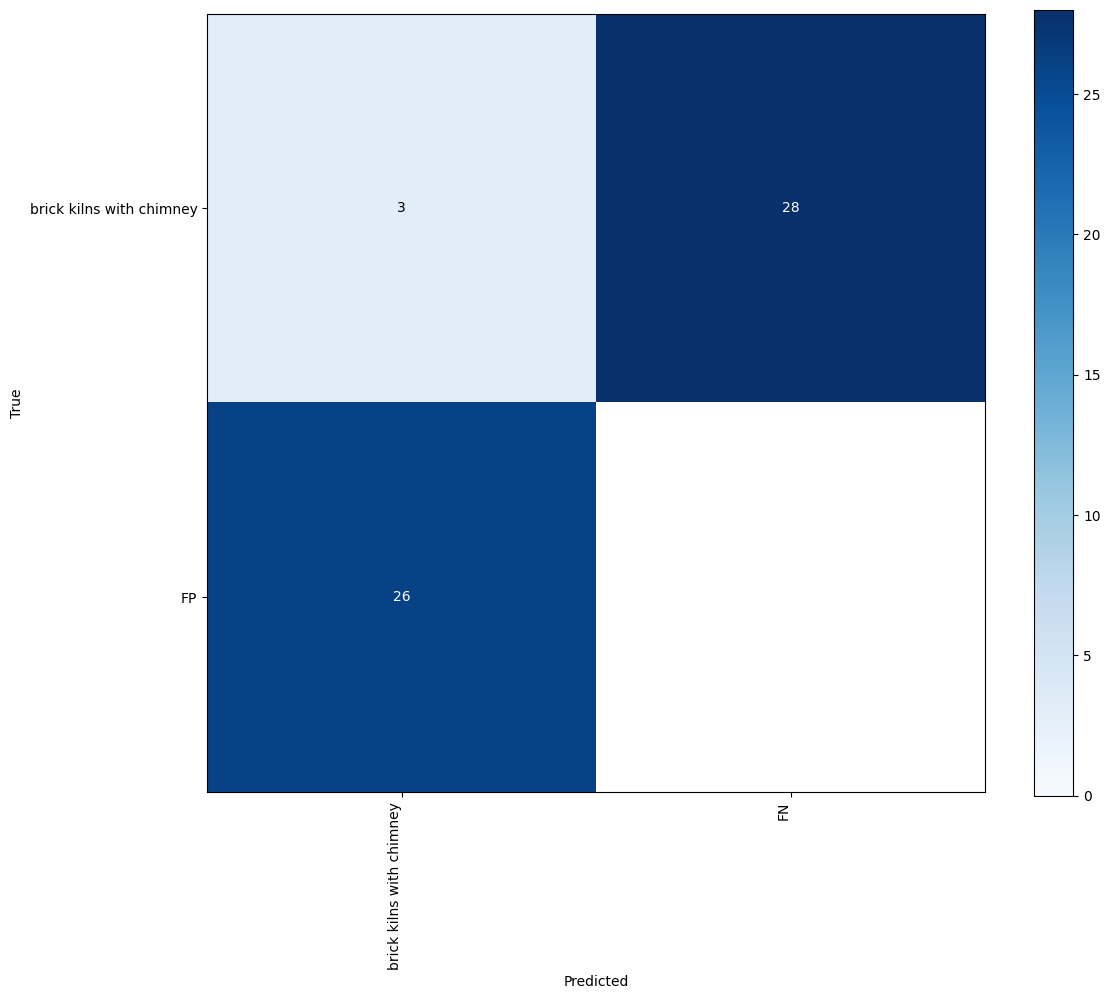

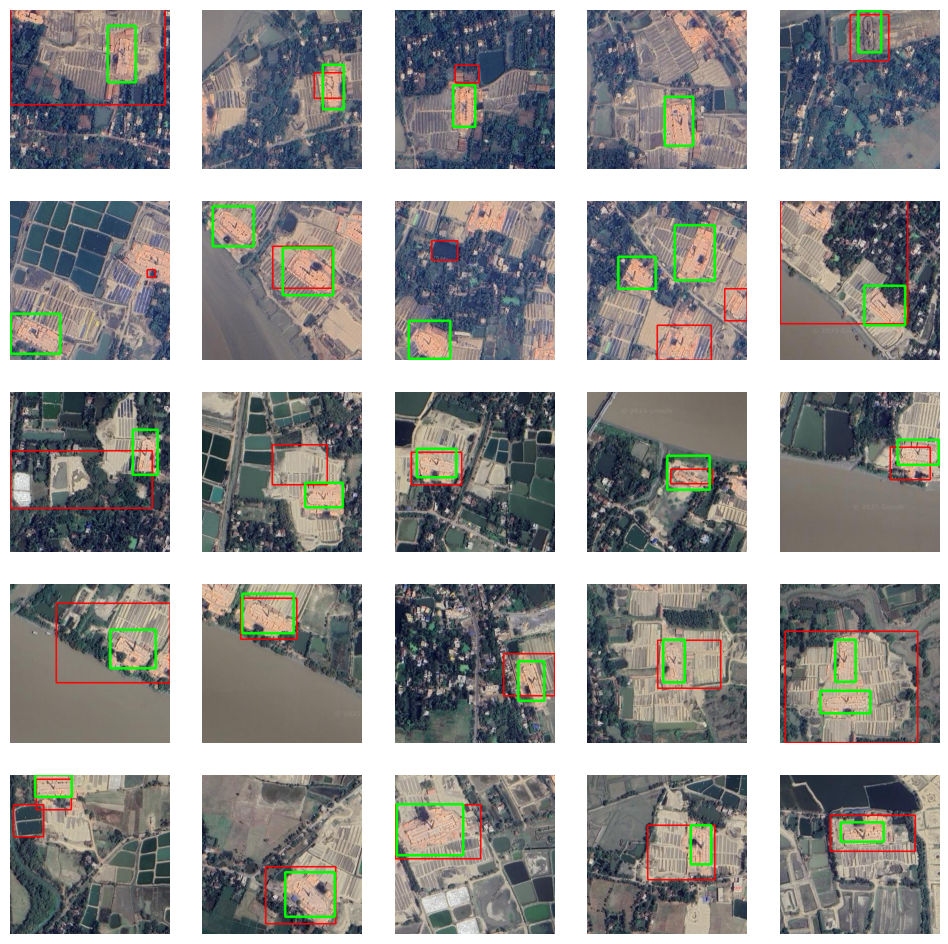

In [3]:
dynamic_dir = './dynamic_lucknow_coco_train_test'
test_both_kilns_background_images = False
train_region = 'west_bengal' # lucknow, west_bengal
test_region = 'west_bengal' # lucknow, west_bengal

wb_model_checkpoints = [
    # '/home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/3B_west_bengal_50_epochs_1_non_bg_0_bg_batch_size_4/checkpoints/latest',
    # '/home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/3B_west_bengal_50_epochs_2_non_bg_0_bg_batch_size_4/checkpoints/latest',
    # '/home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/3B_west_bengal_50_epochs_3_non_bg_0_bg_batch_size_4/checkpoints/latest',
    # '/home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/3B_west_bengal_50_epochs_4_non_bg_0_bg_batch_size_4/checkpoints/latest',
    # '/home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/3B_west_bengal_50_epochs_5_non_bg_0_bg_batch_size_4/checkpoints/latest',
    # '/home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/3B_west_bengal_50_epochs_7_non_bg_0_bg_batch_size_4/checkpoints/latest',
    # '/home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/3B_west_bengal_50_epochs_10_non_bg_0_bg_batch_size_4/checkpoints/latest',
    # '/home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/3B_west_bengal_50_epochs_20_non_bg_0_bg_batch_size_4/checkpoints/latest',
    # '/home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/3B_west_bengal_50_epochs_30_non_bg_0_bg_batch_size_4/checkpoints/latest',
    # '/home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/3B_west_bengal_50_epochs_40_non_bg_0_bg_batch_size_4/checkpoints/latest',
    # '/home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/3B_west_bengal_50_epochs_60_non_bg_0_bg_batch_size_4/checkpoints/latest',
    # '/home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/3B_west_bengal_50_epochs_98_non_bg_0_bg_batch_size_4/checkpoints/latest',
    '/home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/7B_west_bengal_50_epochs_1_non_bg_0_bg_batch_size_4/checkpoints/latest',
    '/home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/7B_west_bengal_50_epochs_2_non_bg_0_bg_batch_size_4/checkpoints/latest',
    '/home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/7B_west_bengal_50_epochs_3_non_bg_0_bg_batch_size_4/checkpoints/latest',
    '/home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/7B_west_bengal_50_epochs_4_non_bg_0_bg_batch_size_4/checkpoints/latest',
    '/home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/7B_west_bengal_50_epochs_5_non_bg_0_bg_batch_size_4/checkpoints/latest',
    '/home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/7B_west_bengal_50_epochs_98_non_bg_0_bg_batch_size_4/checkpoints/latest',
                ]

lucknow_model_checkpoints = [
# '/home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/3B_lucknow_50_epochs_1_non_bg_0_bg_batch_size_4/checkpoints/latest',
# '/home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/3B_lucknow_50_epochs_2_non_bg_0_bg_batch_size_4/checkpoints/latest',
# '/home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/3B_lucknow_50_epochs_3_non_bg_0_bg_batch_size_4/checkpoints/latest',
# '/home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/3B_lucknow_50_epochs_4_non_bg_0_bg_batch_size_4/checkpoints/latest',
# '/home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/3B_lucknow_50_epochs_5_non_bg_0_bg_batch_size_4/checkpoints/latest',
# '/home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/3B_lucknow_50_epochs_7_non_bg_0_bg_batch_size_4/checkpoints/latest',
# '/home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/3B_lucknow_50_epochs_10_non_bg_0_bg_batch_size_4/checkpoints/latest',
# '/home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/3B_lucknow_50_epochs_20_non_bg_0_bg_batch_size_4/checkpoints/latest',
# '/home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/3B_lucknow_50_epochs_30_non_bg_0_bg_batch_size_4/checkpoints/latest',
# '/home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/3B_lucknow_50_epochs_40_non_bg_0_bg_batch_size_4/checkpoints/latest',
# '/home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/3B_lucknow_50_epochs_60_non_bg_0_bg_batch_size_4/checkpoints/latest',
# '/home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/qwen_2_5_vl/3B_lucknow_50_epochs_98_non_bg_0_bg_batch_size_4/checkpoints/latest',
# '/home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/3B_lucknow_50_epochs_98_non_bg_50_bg_batch_size_4/checkpoints/latest',
# '/home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/7B_lucknow_50_epochs_1_non_bg_0_bg_batch_size_4/checkpoints/latest',
# '/home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/7B_lucknow_50_epochs_2_non_bg_0_bg_batch_size_4/checkpoints/latest',
# '/home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/7B_lucknow_50_epochs_3_non_bg_0_bg_batch_size_4/checkpoints/latest',
# '/home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/7B_lucknow_50_epochs_4_non_bg_0_bg_batch_size_4/checkpoints/latest',
# '/home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/7B_lucknow_50_epochs_5_non_bg_0_bg_batch_size_4/checkpoints/latest',
# '/home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/7B_lucknow_50_epochs_7_non_bg_0_bg_batch_size_4/checkpoints/latest',
# '/home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/7B_lucknow_50_epochs_10_non_bg_0_bg_batch_size_4/checkpoints/latest',
# '/home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/7B_lucknow_50_epochs_20_non_bg_0_bg_batch_size_4/checkpoints/latest',
# '/home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/7B_lucknow_50_epochs_30_non_bg_0_bg_batch_size_4/checkpoints/latest',
# '/home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/7B_lucknow_50_epochs_40_non_bg_0_bg_batch_size_4/checkpoints/latest',
# '/home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/7B_lucknow_50_epochs_60_non_bg_0_bg_batch_size_4/checkpoints/latest',
# '/home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/qwen_2_5_vl/7B_lucknow_50_epochs_98_non_bg_0_bg_batch_size_4/checkpoints/latest',
'/home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/7B_lucknow_50_epochs_98_non_bg_50_bg_batch_size_4/checkpoints/latest',
]

if train_region == 'lucknow':
    checkpoints = lucknow_model_checkpoints
if train_region == 'west_bengal':
    checkpoints = wb_model_checkpoints

if test_region == 'lucknow':
    if test_both_kilns_background_images:
        test_set_path = '/home/shataxi.dubey/shataxi_work/vlm_on_planet/gms/lucknow_small_600_sq_km/kiln_images/test_with_background_images'
        create_test_directory(dynamic_dir, test_set_path)
    else:
        test_set_path = '/home/shataxi.dubey/shataxi_work/vlm_on_planet/gms/lucknow_small_600_sq_km/kiln_images/test'
        create_test_directory(dynamic_dir, test_set_path)
        
if test_region == 'west_bengal':
    if test_both_kilns_background_images:
        test_set_path = '/home/shataxi.dubey/shataxi_work/vlm_on_planet/gms/west_bengal_small_639_sq_km/kiln_images/test_with_background_images'
        create_test_directory(dynamic_dir, test_set_path)
    else:
        test_set_path = '/home/shataxi.dubey/shataxi_work/vlm_on_planet/gms/west_bengal_small_639_sq_km/kiln_images/test'
        create_test_directory(dynamic_dir, test_set_path)

with pd.ExcelWriter(f'Qwen2_5_VL_train_{train_region}_test_{test_region}_{param}B_Instruct.xlsx', engine = 'xlsxwriter') as writer:
    row = 0

    # for model_checkpoint in checkpoints:
    for model_checkpoint in ["Qwen/Qwen2.5-VL-3B-Instruct"]:

        processor, model = load_model(
            model_id_or_path= model_checkpoint,
            min_pixels=MIN_PIXELS,
            max_pixels=MAX_PIXELS,
            )

        train_loader, valid_loader, test_loader = create_data_loaders(
                        dataset_location= dynamic_dir,
                        train_batch_size= 4,
                        train_collect_fn= partial(train_collate_fn, processor=processor, system_message=SYSTEM_MESSAGE),
                        # train_num_workers=10,
                        test_batch_size= 4,
                        test_collect_fn= partial(evaluation_collate_fn, processor=processor, system_message=SYSTEM_MESSAGE),
                        detections_to_prefix_formatter=detections_to_prefix_formatter,
                        detections_to_suffix_formatter=partial(
                detections_to_suffix_formatter, min_pixels=MIN_PIXELS, max_pixels=MAX_PIXELS
            ),
                        )
        
        CLASSES = test_loader.dataset.coco_dataset.classes
        test_dataset = test_loader.dataset.coco_dataset
        class_mapping = create_class_mapping(test_dataset, is_dota_dataset = False)
        predictions, targets, images_list = evaluate_finetuned_qwen2_5_vl_model(model, processor, test_loader, class_mapping)
        map_result, map_result_50, map_result_50_95 = calculate_map(predictions, targets)
        print(model_checkpoint)
        df = calculate_confusion_matrix(predictions, targets, CLASSES, map_result)
        display(df)
        df.index = [model_checkpoint]*len(df)
        df.to_excel(writer, sheet_name="Sheet1", startrow = row)
        row += len(df) + 2
        visualize_predictions(predictions, targets, images_list, start=0, end=25, rows=5, cols=5)
        del model
        torch.cuda.empty_cache()
        gc.collect()



In [ ]:
visualize_predictions(predictions, targets, images_list,start=0, end=25, rows=5, cols=5)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (1, 3) + inhomogeneous part.

This error occurs because Qwen generates incorrect bounding box. This problem occurred for this checkpoint
/home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/3B_lucknow_50_epochs_10_non_bg_0_bg_batch_size_4/checkpoints/latest
/home/shataxi.dubey/shataxi_work/vlm_on_planet/Qwen2.5_VL/gms_training/3B_lucknow_50_epochs_20_non_bg_0_bg_batch_size_4/checkpoints/latest